In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import copy 

In [144]:
data = pd.read_excel("251.ods", engine='odf', usecols="I, J", nrows = 7)
data.head(10)

,T,p_av
0,20.7,153.027171
1,25.0,151.121284
2,30.0,156.044825
3,35.0,162.397781
4,40.0,161.921309
5,50.0,159.380127
6,60.0,153.980114


In [145]:
def lin_plot(x, y, color, marker = '.'):
    coeffs = np.polyfit(x, y, 1)
    equ = lambda x: coeffs[0] * x + coeffs[1]
    
    # plt.scatter(x, y, marker=marker, color = color)
    x_space = np.linspace(min(x)/1.01, max(x)*1.01, 100)
    plt.plot(x_space, equ(x_space), color = color)

In [146]:
def least_sq(x, y):
    sx = (x**2).mean() - (x.mean())**2
    sy = (y**2).mean() - (y.mean())**2
    rxy = (y*x).mean() - (y.mean() * x.mean())
    a = rxy / sx
    da = (1/(len(x) - 2) * (sy/sx - a**2))**(0.5)
    b = y.mean() - a * x.mean()
    db = da*(sx + (x.mean())**2)**(1/2)
    dat = pd.DataFrame({
        '$\overline{x}$' : [x.mean()],
        '$\sigma_x^2$'   : [sx],
        '$\overline{y}$' : [y.mean()],
        '$\sigma_y^2$'   : [sy],
        '$r_{xy}$'       : [rxy],
        '$a$'            : [a],
        '$\Delta a$'     : [da],
        '$b$'            : [b],
        '$\Delta b$'     : [db],
    })
    return dat, [x.mean(), sx, y.mean(), sy, rxy, a, da, b, db]

In [147]:
T = data['T'].dropna()
p = data['p_av'].dropna()
r = 0.61                  # mm
sgm = p*r/2               # Pa * mm = mN
print(sgm)

sgm_clean = sgm.drop([0, 1, 2])
T_clean   =   T.drop([0, 1, 2])


0    46.673287
1    46.091992
2    47.593672
3    49.531323
4    49.385999
5    48.610939
6    46.963935
Name: p_av, dtype: float64


In [148]:
out = pd.read_excel("251.ods", engine = 'odf', usecols="I:T")
out = out.dropna()

# array for replacing names for latex document
rng = np.arange(1, 15)
names = dict([
    ("P_{}".format(i), r"$p_{{{0}}}, \text{{Па}}$".format(i)) for i in rng
])
names['p_av'] = r"$p_{av}, \text{Па}$"
names['T']    = r"$T, ^{\circ}\text{C}$"

# set number format for latex document
out_fmt = dict([
    (names["P_{}".format(i)], "{:.1f}") for i in rng
])
out_fmt[names['T']]    = "{:.1f}"
out_fmt[names['p_av']] = "{:.1f}"

# convert to latex
latex = out.rename(
            columns=(names)
        ).style.hide(level=0, axis=0).format(out_fmt).to_latex(
            buf = 'T_p_raw.tex',
            # label = 'tab:linear',
            # caption = r'Зависимость $p(T)$',
            column_format="c" * rng.size,
            # position_float = 'centering',
            hrules=True,
            multicol_align = 'c',
            environment = ''
        )


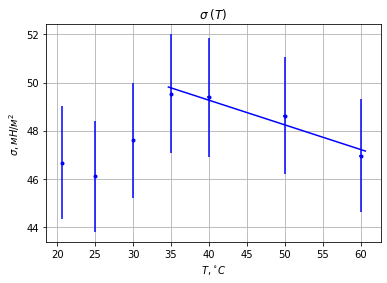

In [149]:
# x_spc = np.linspace(T_up.min(), T_up.max(), 100)
# spline = UnivariateSpline(T_up, p_up, s=1000000)
# plt.plot(x_spc, spline(x_spc), c='orange')

# plt.errorbar(T_up, p_up, yerr=100, xerr=0.2, fmt='none', c='orange', label='Нагрев', )
plt.errorbar(T, sgm, xerr=0.2, yerr=0.05*sgm, fmt='.', c='blue')

lin_plot(T_clean, sgm_clean, 'blue')

plt.title("$\sigma \; (T)$")
plt.ylabel(r"$ \sigma, мН/м^2$")
plt.xlabel(r"$ T, ^{\circ} C$")
plt.grid(True)

plt.savefig("sgm_T.pdf")

In [150]:
out = pd.DataFrame({'T' : T, 'p' : p, 'sgm' : sgm})

names = {
    'T'   : r"$T, ^{\circ}\text{C}$",
    'p'   : r"$p, \text{Па}$",
    'sgm' : r"$\sigma, \text{мН}/\text{м}$"
}

out_fmt = {
    names['T']   : "{:.1f}",
    names['p']   : "{:.1f}",
    names['sgm'] : "{:.1f}",
}

latex = out.rename(
            columns=(names)
        ).style.hide(level=0, axis=0).format(out_fmt).to_latex(
            buf = 'T_p_sgm.tex',
            # label = 'tab:linear',
            # caption = r'Зависимость $\overline{p}(T)$',
            column_format="c" * 3 ,
            # position_float = 'centering',
            hrules=True,
            multicol_align = 'c',
            environment = ''
        )


In [151]:
mnk_fmt = {
        '$\overline{x}$' : "{:.2e}",
        '$\sigma_x^2$'   : "{:.2e}",
        '$\overline{y}$' : "{:.2f}",
        '$\sigma_y^2$'   : "{:.2e}",
        '$r_{xy}$'       : "{:.2e}",
        '$a$'            : "{:.2f}",
        '$\Delta a$'     : "{:.2f}",
        '$b$'            : "{:.2f}",
        '$\Delta b$'     : "{:.2f}",
}

df, dat = least_sq(T_clean, sgm_clean)

dsgmdT = dat[5] # 'a' coeff

latex = df.style.hide(level=0, axis=0).format(mnk_fmt).to_latex()
print(latex)
df

\begin{tabular}{rrrrrrrrr}
$\overline{x}$ & $\sigma_x^2$ & $\overline{y}$ & $\sigma_y^2$ & $r_{xy}$ & $a$ & $\Delta a$ & $b$ & $\Delta b$ \\
4.62e+01 & 9.22e+01 & 48.62 & 1.04e+00 & -9.46e+00 & -0.10 & 0.02 & 53.37 & 0.91 \\
\end{tabular}



,$\overline{x}$,$\sigma_x^2$,$\overline{y}$,$\sigma_y^2$,$r_{xy}$,$a$,$\Delta a$,$b$,$\Delta b$
0,46.25,92.1875,48.623049,1.039965,-9.461189,-0.10263,0.01934,53.36968,0.913561


## Графики q(T) и U/F(T)

In [152]:
q = -T_clean*dsgmdT
U_F = sgm_clean - T_clean*dsgmdT

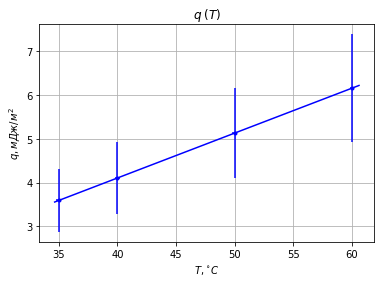

In [153]:
lin_plot(T_clean, q, 'blue')
plt.errorbar(T_clean, q, xerr=0.2, yerr=0.2*q, fmt='.', c='blue')

plt.title("$q \; (T)$")
plt.ylabel(r"$ q, мДж/м^2$")
plt.xlabel(r"$ T, ^{\circ} C$")
plt.grid(True)

plt.savefig("q_T.pdf")

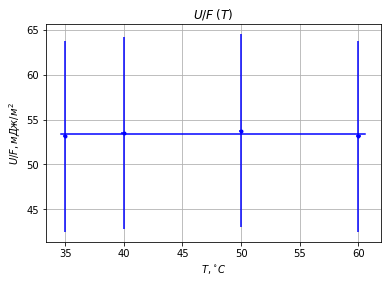

In [154]:
lin_plot(T_clean, U_F, 'blue')
plt.errorbar(T_clean, U_F, xerr=0.2, yerr=0.2*U_F, fmt='.', c='blue')

plt.title("$U/F \; (T)$")
plt.ylabel(r"$ U/F, мДж/м^2$")
plt.xlabel(r"$ T, ^{\circ} C$")
plt.grid(True)

plt.savefig("U_F_T.pdf")

In [155]:
out = pd.DataFrame({'T' : T_clean, 'q' : q, 'U_F' : U_F})

names = {
    'T'   : r"$T, ^{\circ}\text{C}$",
    'q'   : r"$q, \text{мДж}/\text{м}^2$",
    'U_F' : r"$U/F, \text{мДж}/\text{м}^2$"
}

out_fmt = {
    names['T']   : "{:.1f}",
    names['q']   : "{:.2f}",
    names['U_F'] : "{:.1f}",
}

latex = out.rename(
            columns=(names)
        ).style.hide(level=0, axis=0).format(out_fmt).to_latex(
            buf = 'T_q_U_F.tex',
            # label = 'tab:linear',
            # caption = r'Зависимости $q(T), \; U/F(T)$',
            column_format="c" * 3,
            # position_float = 'centering',
            hrules=True,
            multicol_align = 'c',
            environment = ''
        )
